## Breadth-first graph search

In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import queue
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

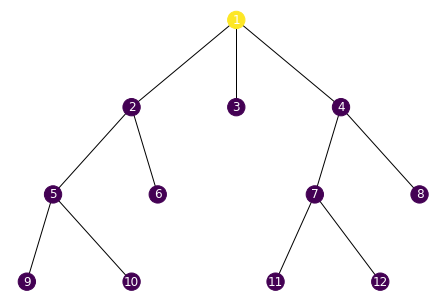

Opened node list: 1


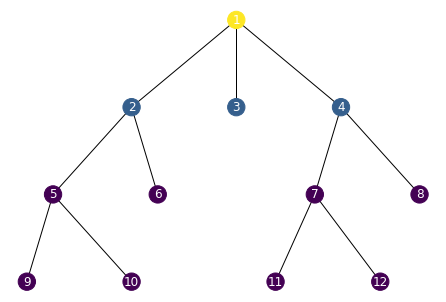

Just opened: 1.
Visited node list: ['1'].
Opened node list: ['2', '3', '4']


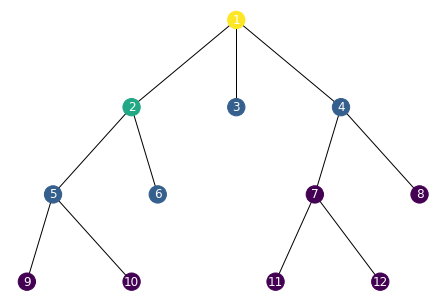

Just opened: 2.
Visited node list: ['1', '2'].
Opened node list: ['5', '6']


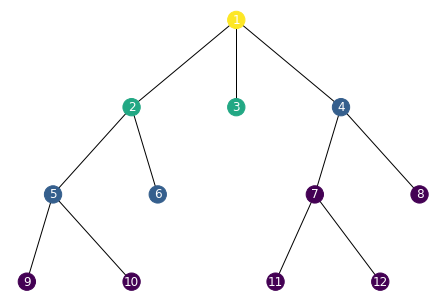

Just opened: 3.
Visited node list: ['1', '2', '3'].
Opened node list: []


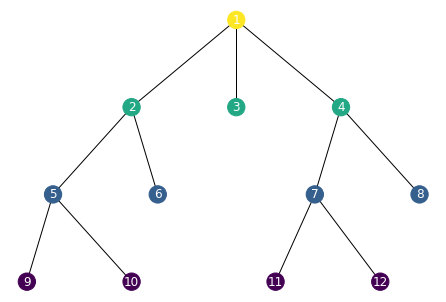

Just opened: 4.
Visited node list: ['1', '2', '3', '4'].
Opened node list: ['8', '7']


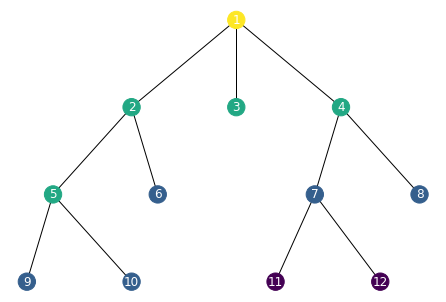

Just opened: 5.
Visited node list: ['1', '2', '3', '4', '5'].
Opened node list: ['10', '9']


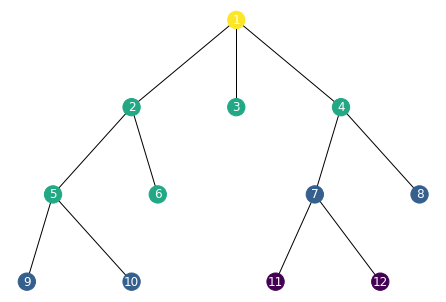

Just opened: 6.
Visited node list: ['1', '2', '3', '4', '5', '6'].
Opened node list: []


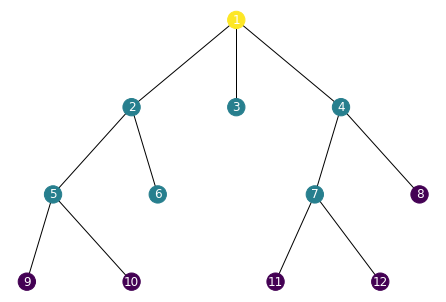

Just opened: 7.
Visited node list: ['1', '2', '3', '4', '5', '6', '7'].
Opened node list: ['11', '12']


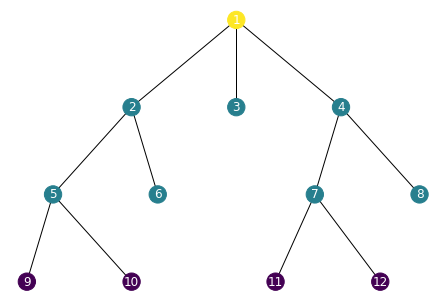

Just opened: 8.
Visited node list: ['1', '2', '3', '4', '5', '6', '7', '8'].
Opened node list: []


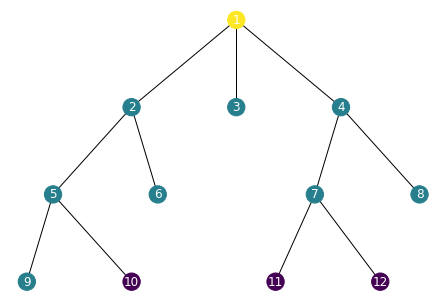

Just opened: 9.
Visited node list: ['1', '2', '3', '4', '5', '6', '7', '8', '9'].
Opened node list: []


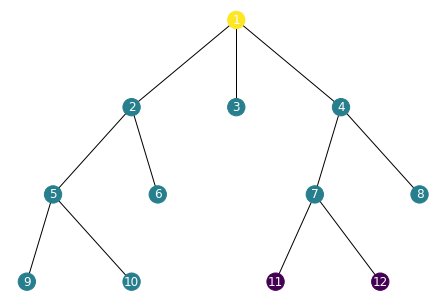

Just opened: 10.
Visited node list: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'].
Opened node list: []


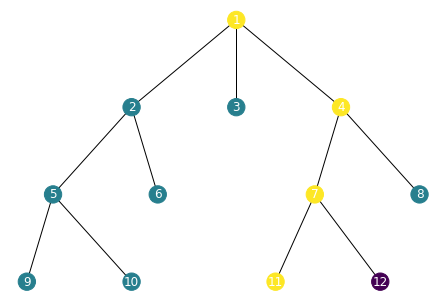

['1', '4', '7', '11']

In [5]:
graph = [
        ('1', '2'),
        ('1', '3'),
        ('1', '4'),
        ('2', '5'),
        ('2', '6'),
        ('5', '9'),
        ('5', '10'),
        ('4', '7'),
        ('4', '8'),
        ('7', '11'),
        ('7', '12')
        ]

G = nx.Graph()
G.add_edges_from(graph)

val_map = { '1': 1.0 }

values = lambda x: [x.get(node, 0.0) for node in G.nodes()]
pos = graphviz_layout(G, 'dot', '1')

nx.draw(G, pos, cmap=plt.get_cmap('viridis'), node_color=values(val_map), with_labels=True, font_color='white')
plt.show()

def bfs(graph, start, end):
    q = queue.Queue()
    excluded = []
    q.put([start])
    print(f'Opened node list: {start}')
    while not q.empty():
        path = q.get()
        node = path[-1]
        excluded.append(node)
        if not node == start:
          val_map[node] = 0.6
        if node == end:
          for x in path:
            val_map[x] = 1
          pos = graphviz_layout(graph, 'dot', start)
          nx.draw(G, pos, cmap=plt.get_cmap('viridis'), node_color=values(val_map), with_labels=True, font_color='white')
          plt.show()
          return path
        for adjacent in [x for x in graph.neighbors(node)]:
          if adjacent not in excluded:
            new_path = list(path)
            new_path.append(adjacent)
            q.put(new_path)
            val_map[adjacent] = 0.3
        pos = graphviz_layout(graph, 'dot', start)
        nx.draw(G, pos, cmap=plt.get_cmap('viridis'), node_color=values(val_map), with_labels=True, font_color='white')
        plt.show()
        print(f'Just opened: {node}.')
        print(f'Visited node list: {excluded}.')
        print(f'Opened node list: {list(set([x for x in graph.neighbors(node)]) - set(excluded))}')

bfs(G, '1', '11')